In [11]:
## 탐색전 데이터 분석(EDA)
- 데이터 주요 특성 파악하고 패턴찾고 이상값 식별, 가설 세우기 위한 일련의 방법론
- 데이터 분석 초기 단계에 수행되며, 데이터를 시각화하고 통계적으로 요약한다

1. 분포와 패턴 파악
2. 이상값 탐지
3. 변수 간 관계확인
4. 데이터 통계적 요약

SyntaxError: invalid syntax (2980087382.py, line 2)

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

train = pd.read_csv('./file/train.csv', index_col="PassengerId")
train.shape 

(891, 11)

In [16]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [28]:
gender_mean = train.groupby('Sex')['Age'].mean()
gender_mean

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [34]:
# 여성 중 나이가 비어있는 값에 대해 평균 나이로 채움
train.loc[(train['Sex'] == 'female') & (train['Age'].isnull()), 'Age'] = int(gender_maen['female'])

# 남성 중 나이가 비어있는 값에 대해 평균 나이로 채움
train.loc[(train['Sex'] == 'male') & (train['Age'].isnull()), 'Age'] = int(gender_maen['male'])
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [43]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [45]:
train['Cabin'] = train['Cabin'].fillna('N')
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [53]:
train = train.dropna()
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [55]:
train['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [57]:
# 컬럼 생성
train['Survived_label'] = train['Survived'].replace(0, 'Dead').replace(1, 'Surviveed')
train['Survived_label'].value_counts()

Survived_label
Dead         549
Surviveed    340
Name: count, dtype: int64

<Axes: xlabel='Survived_label'>

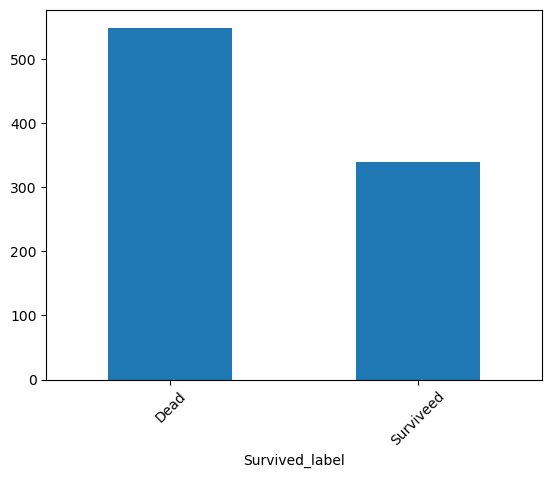

In [66]:
train['Survived_label'].value_counts().plot(kind='bar', rot=45)

<Axes: ylabel='count'>

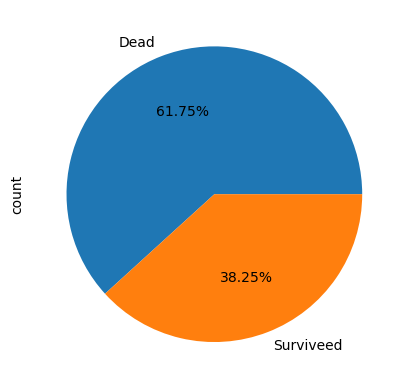

In [70]:
train['Survived_label'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: xlabel='pclass_label'>

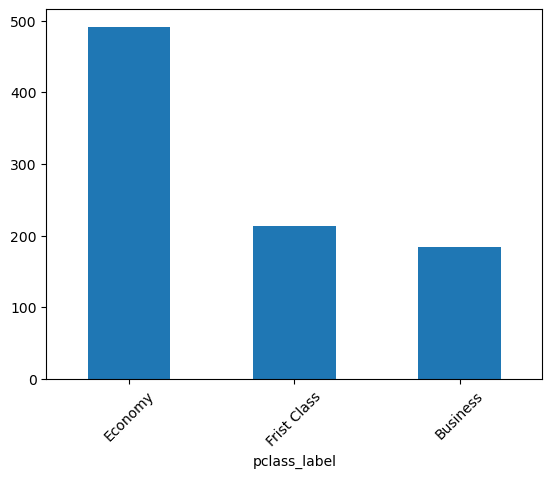

In [82]:
train['pclass_label'] = train['Pclass'].replace(1, 'Frist Class').replace(2, 'Business').replace(3, 'Economy')
train['pclass_label'].value_counts().plot(kind='bar', rot=45)

<Axes: xlabel='pclass_label', ylabel='count'>

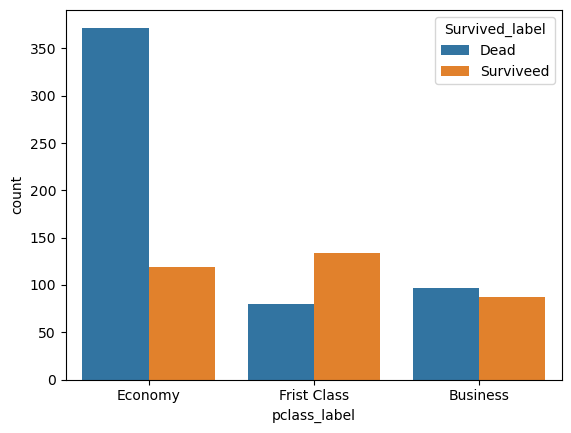

In [84]:
sns.countplot(data=train, x='pclass_label', hue='Survived_label')

<Axes: xlabel='Sex', ylabel='count'>

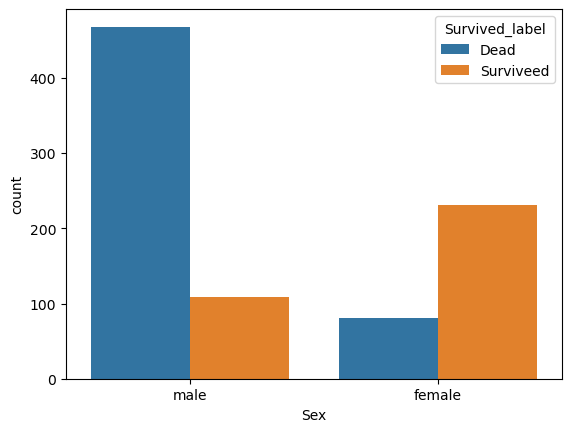

In [86]:
sns.countplot(data=train, x='Sex', hue='Survived_label')

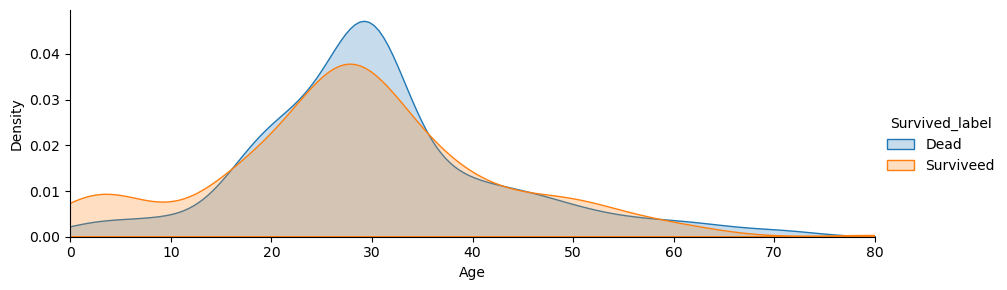

In [92]:
# 나이별 생존여부
f = sns.FacetGrid(train, hue='Survived_label', aspect=3)
f.map(sns.kdeplot, 'Age', fill=True)
f.set(xlim=(0, train['Age'].max()))
f.add_legend()

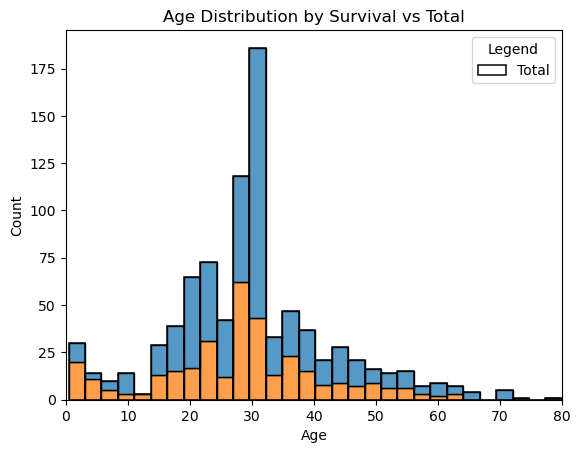

In [114]:
# 생존자와 비생존자의 분포를 겹치지 않게 스택으로 표시
sns.histplot(data=train, x='Age', hue='Survived_label', multiple='stack', bins=30, fill=True)

# 전체 데이터의 나이 분포 추가 (생존자 + 비생존자)
sns.histplot(data=train, x='Age', bins=30, color='black', fill=False, label='Total', edgecolor='black')

# x축 범위 설정
plt.xlim(0, train['Age'].max())

# 그래프 제목과 축 라벨 설정
plt.title("Age Distribution by Survival vs Total")
plt.xlabel("Age")
plt.ylabel("Count")

# 레전드 추가
plt.legend(title='Legend')

# 그래프 출력
plt.show()

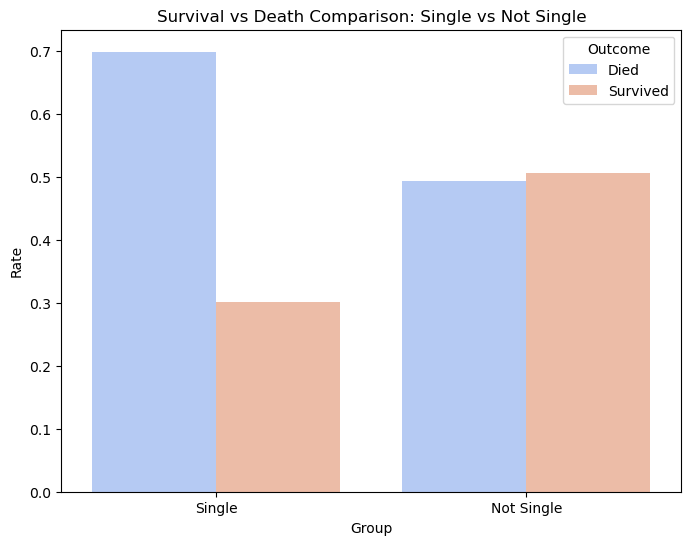

In [119]:
# 'Single' 여부를 나타내는 새로운 열 생성
train['Single'] = (train['SibSp'] == 0) & (train['Parch'] == 0)
train['Single'] = train['Single'].replace({True: 'Single', False: 'Not Single'})

# 'Single'과 'Not Single' 그룹의 생존 여부 카운트 (사망: 0, 생존: 1)
single_group = train[train['Single'] == 'Single']['Survived'].value_counts(normalize=True)
not_single_group = train[train['Single'] == 'Not Single']['Survived'].value_counts(normalize=True)

# 데이터를 준비 (사망과 생존 비율)
data = {
    'Group': ['Single', 'Single', 'Not Single', 'Not Single'],
    'Outcome': ['Died', 'Survived', 'Died', 'Survived'],
    'Rate': [
        single_group[0],  # Single - Died
        single_group[1],  # Single - Survived
        not_single_group[0],  # Not Single - Died
        not_single_group[1]  # Not Single - Survived
    ]
}

# DataFrame으로 변환
df = pd.DataFrame(data)

# 막대 차트 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Rate', hue='Outcome', data=df, palette='coolwarm', dodge=True)

# 막대의 너비를 좁게 설정
plt.title('Survival vs Death Comparison: Single vs Not Single')
plt.xlabel('Group')
plt.ylabel('Rate')

# 그래프 출력
plt.show()
